# Вариант 2

Обязательные требования:
1. Все графики должны быть подписаны (заголовок, оси)
2. К каждому графику должны быть представлены выводы (что вы увидели, какие зависимости, какие особенности, что тот или иной график говорит вам о данных).
3. Графики должны быть читабельными (если сделаете такой масштаб, что ничего не будет видно или все будет налазить друг на друга - это не засчитывается).

In [ ]:
!pip install pandas
!pip install matplotlib

## Загрузка данных

Вам дан датасет о качестве воздуха в различных регионах: `pollution_dataset.csv`

Основные характеристики:

- Температура (°C): Средняя температура региона.
- Влажность (%): Относительная влажность, зарегистрированная в регионе.
- Концентрация PM2.5 (мкг/м³): Уровни мелких твердых частиц.
- Концентрация PM10 (мкг/м³): Уровни крупных твердых частиц.
- Концентрация NO2 (ppb): Уровни диоксида азота.
- Концентрация SO2 (ppb): Уровни диоксида серы.
- Концентрация CO (ppm): Уровни оксида углерода.
- Близость к промышленным зонам (км): Расстояние до ближайшей промышленной зоны.
- Плотность населения (чел./км²): Количество людей на квадратный километр в регионе.
- Уровни качества воздуха:
    - Хорошее (Good): Чистый воздух с низким уровнем загрязнения.
    - Умеренный (Moderate): Приемлемое качество воздуха, но присутствуют некоторые загрязняющие вещества.
    - Плохой (Poor): Заметное загрязнение, которое может вызвать проблемы со здоровьем у чувствительных групп.
    - Опасный (Hazardous): Сильно загрязненный воздух, представляющий серьезные риски для здоровья населения.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('pollution_dataset.csv', header=0)
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


## График 1

Построить точечный график зависимости переменной `NO2` от `CO` с учётом третей переменной `Air Quality`.

прямая зависимость NO2 от CO, у плохого и опасного воздуха появляются выбросы в виде большого содержания NO2 или CO






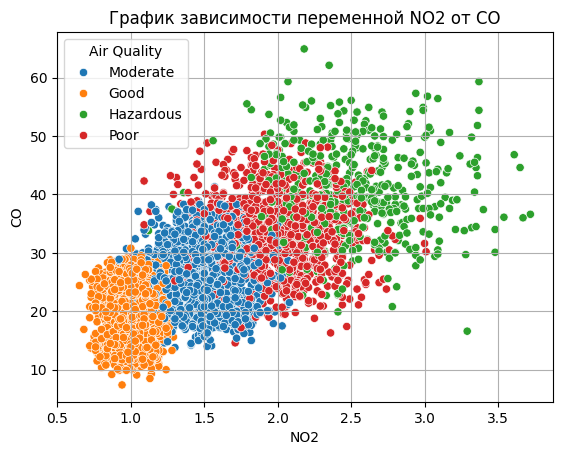

In [6]:
fig, ax = plt.subplots()
#ax.scatter(df["CO"], df["NO2"], c=param.map(air), s=1, alpha=1)
sns.scatterplot(df, x=df["CO"], y=df["NO2"], hue="Air Quality")
plt.xlabel("NO2")
plt.ylabel("CO")
plt.title("График зависимости переменной NO2 от CO")
plt.grid()
plt.show()



## График 2

Постройте 4 графика на одной фигуре, как расположить координатные плоскости - это на ваше усмотрение.

Это должны быть графики для следующих переменных:
- `Air Quality` - гистограмма
- `Population_Density` - график распределения
- `Temperature` - график распределения
- `Humidity` - график распределения

Каждый график должен быть своего цвета, также задайте цвет отличный от белого для бекграунда всей фигуры.


Население сосредоточено в местах со средним показателем температуры и влажности, а также с ростом населения увеличивается загрязнение

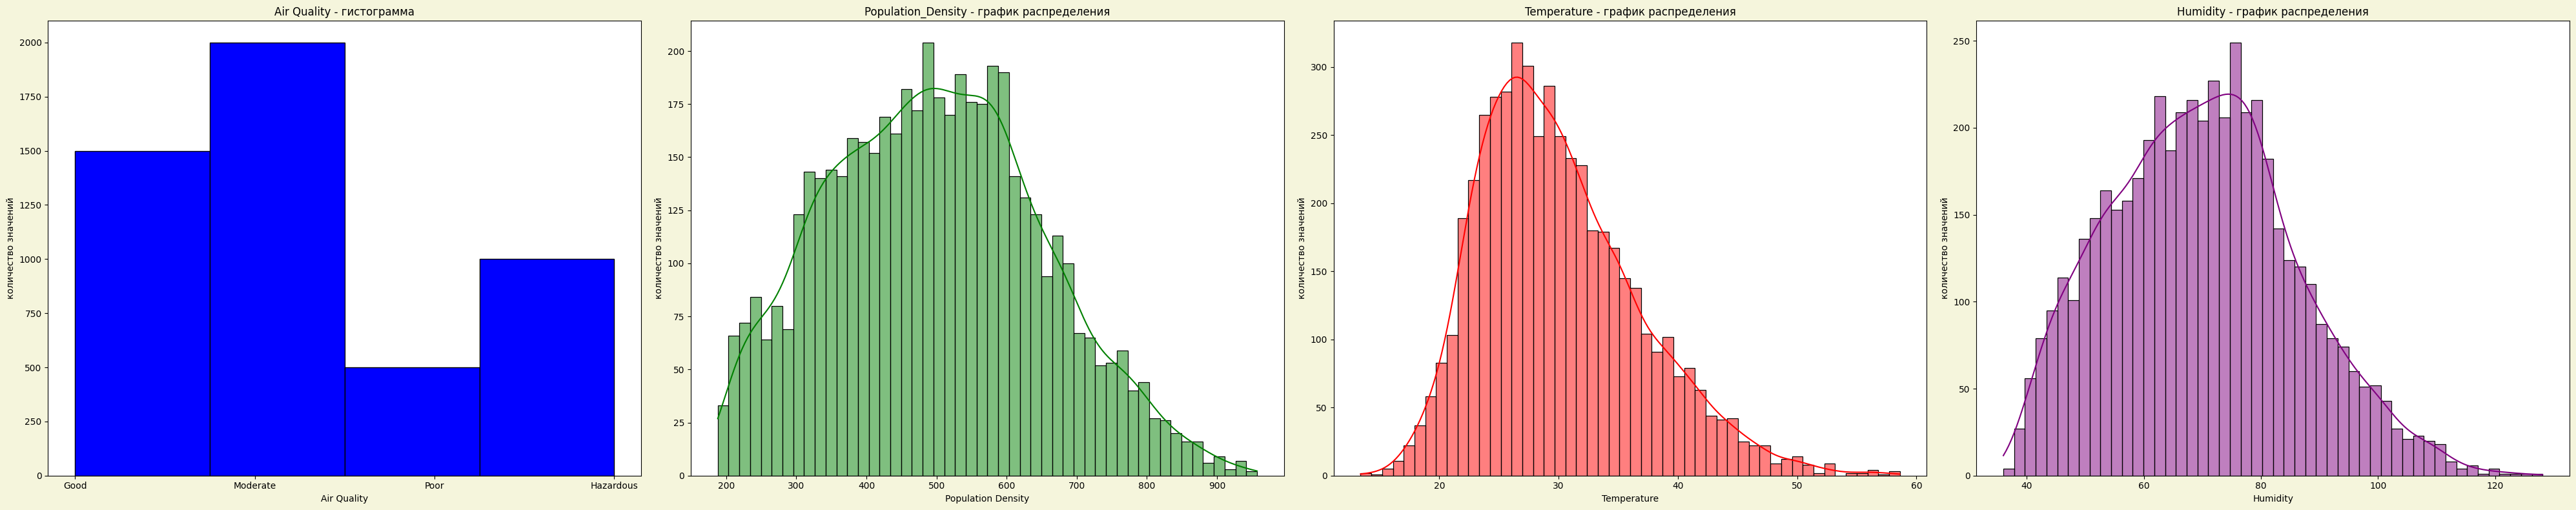

In [28]:
fig, ax = plt.subplots(1,4, figsize=(40, 8))

ax[0].hist(df['Air Quality'], bins=4, color='blue',edgecolor='black')
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(['Good', 'Moderate', 'Poor', 'Hazardous'])
ax[0].set_title('Air Quality - гистограмма')
ax[0].set_xlabel('Air Quality')
ax[0].set_ylabel('количество значений')

sns.histplot(df['Population_Density'], bins=50, kde=True, color='green', ax=ax[1], edgecolor='black')
ax[1].set_title('Population_Density - график распределения')
ax[1].set_xlabel('Population Density')
ax[1].set_ylabel('количество значений')

sns.histplot(df['Temperature'], bins=50, kde=True, color='red', ax=ax[2], edgecolor='black')
ax[2].set_title('Temperature - график распределения')
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel('количество значений')

sns.histplot(df['Humidity'], bins=50, kde=True, color='purple', ax=ax[3], edgecolor='black')
ax[3].set_title('Humidity - график распределения')
ax[3].set_xlabel('Humidity')
ax[3].set_ylabel('количество значений')

fig.set_facecolor('beige')

plt.tight_layout()
plt.show()

## График 3

Визуализируйте матрицу корреляции в виде heatmap.

Все должно быть ЧИТАБЕЛЬНО!

коэффицент зависимости каждой переменной от другой, отрицательная корреляция показывает что у значений обратная зависимость

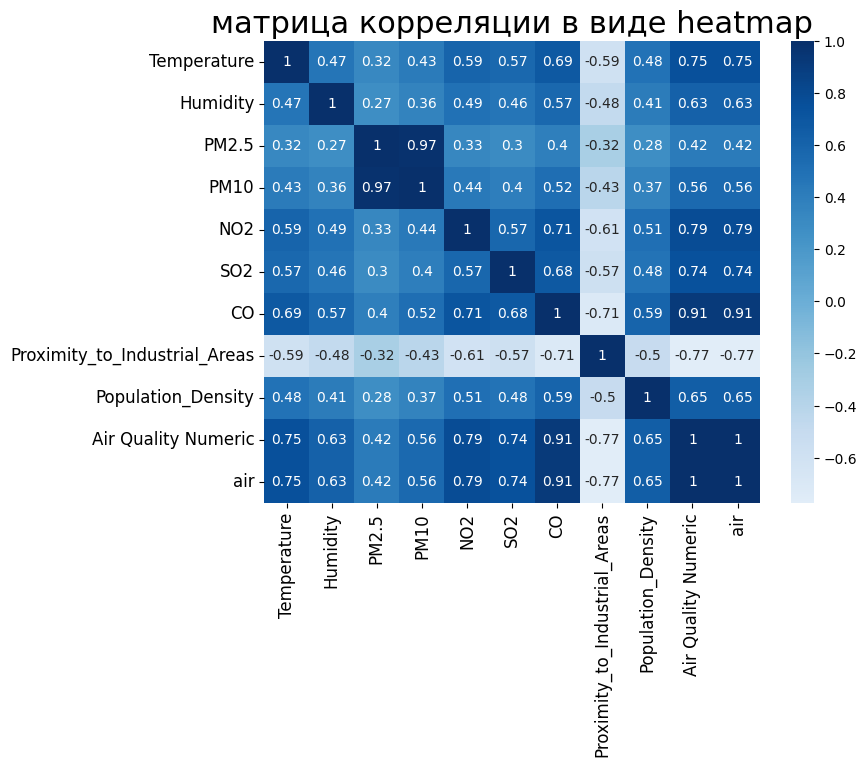

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='Blues', center=0, annot=True)
plt.title('матрица корреляции в виде heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## График 4

Постройте графики boxplot для следующих переменных:
- `CO` с учетом переменной `Air Quality`
- `NO2` с учетом переменной `Air Quality`

Как их построить решаете самостоятельно.

Проанализируйте выборы.

видно количество выбросов, а также относительное количество медианных значений

<ipython-input-74-5da8c59f8e65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Air Quality', y='CO', ax=ax[0], palette="Set2")
<ipython-input-74-5da8c59f8e65>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Air Quality', y='NO2', ax=ax[1], palette="Set2")


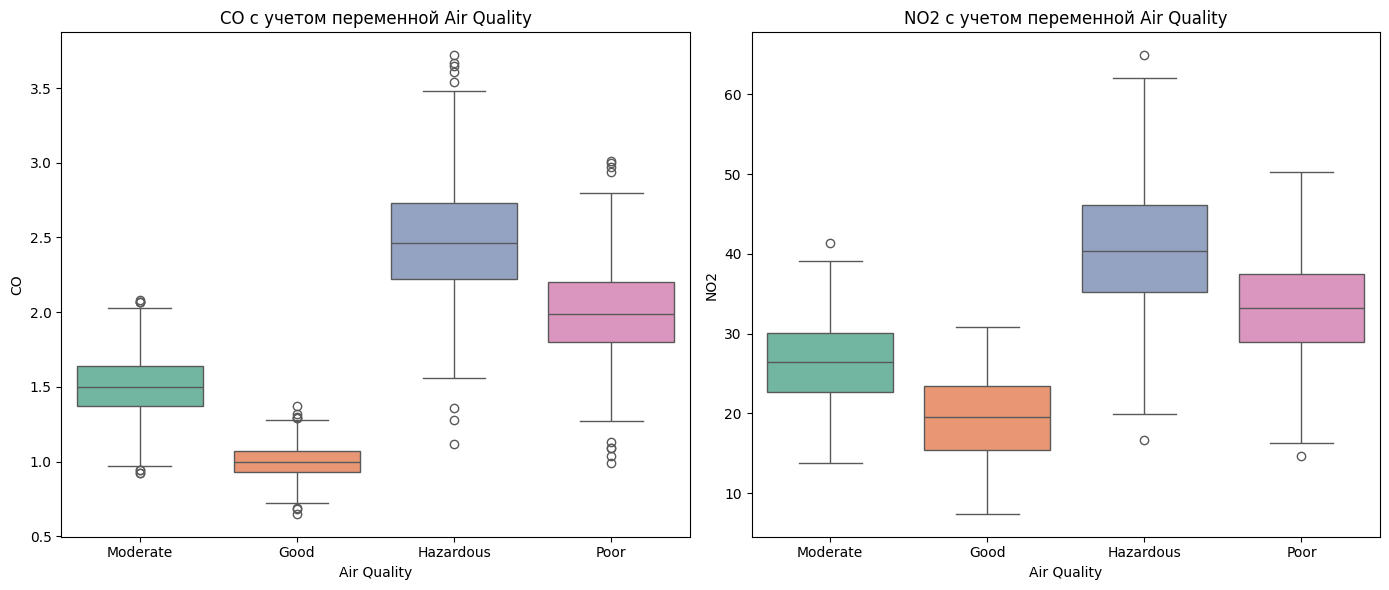

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x='Air Quality', y='CO', ax=ax[0], palette="Set2")
ax[0].set_title('CO с учетом переменной Air Quality')
ax[0].set_xlabel('Air Quality')
ax[0].set_ylabel('CO')

sns.boxplot(data=df, x='Air Quality', y='NO2', ax=ax[1], palette="Set2")
ax[1].set_title('NO2 с учетом переменной Air Quality')
ax[1].set_xlabel('Air Quality')
ax[1].set_ylabel('NO2')

plt.tight_layout()
plt.show()


## График 5

Постройте heatmap для отображения пропусков в данных.

пропуски встречаются только в показателях SO2 (чаще всего) и PM2.5 (реже).

<ipython-input-14-ea67b568bdec>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 0 else x)


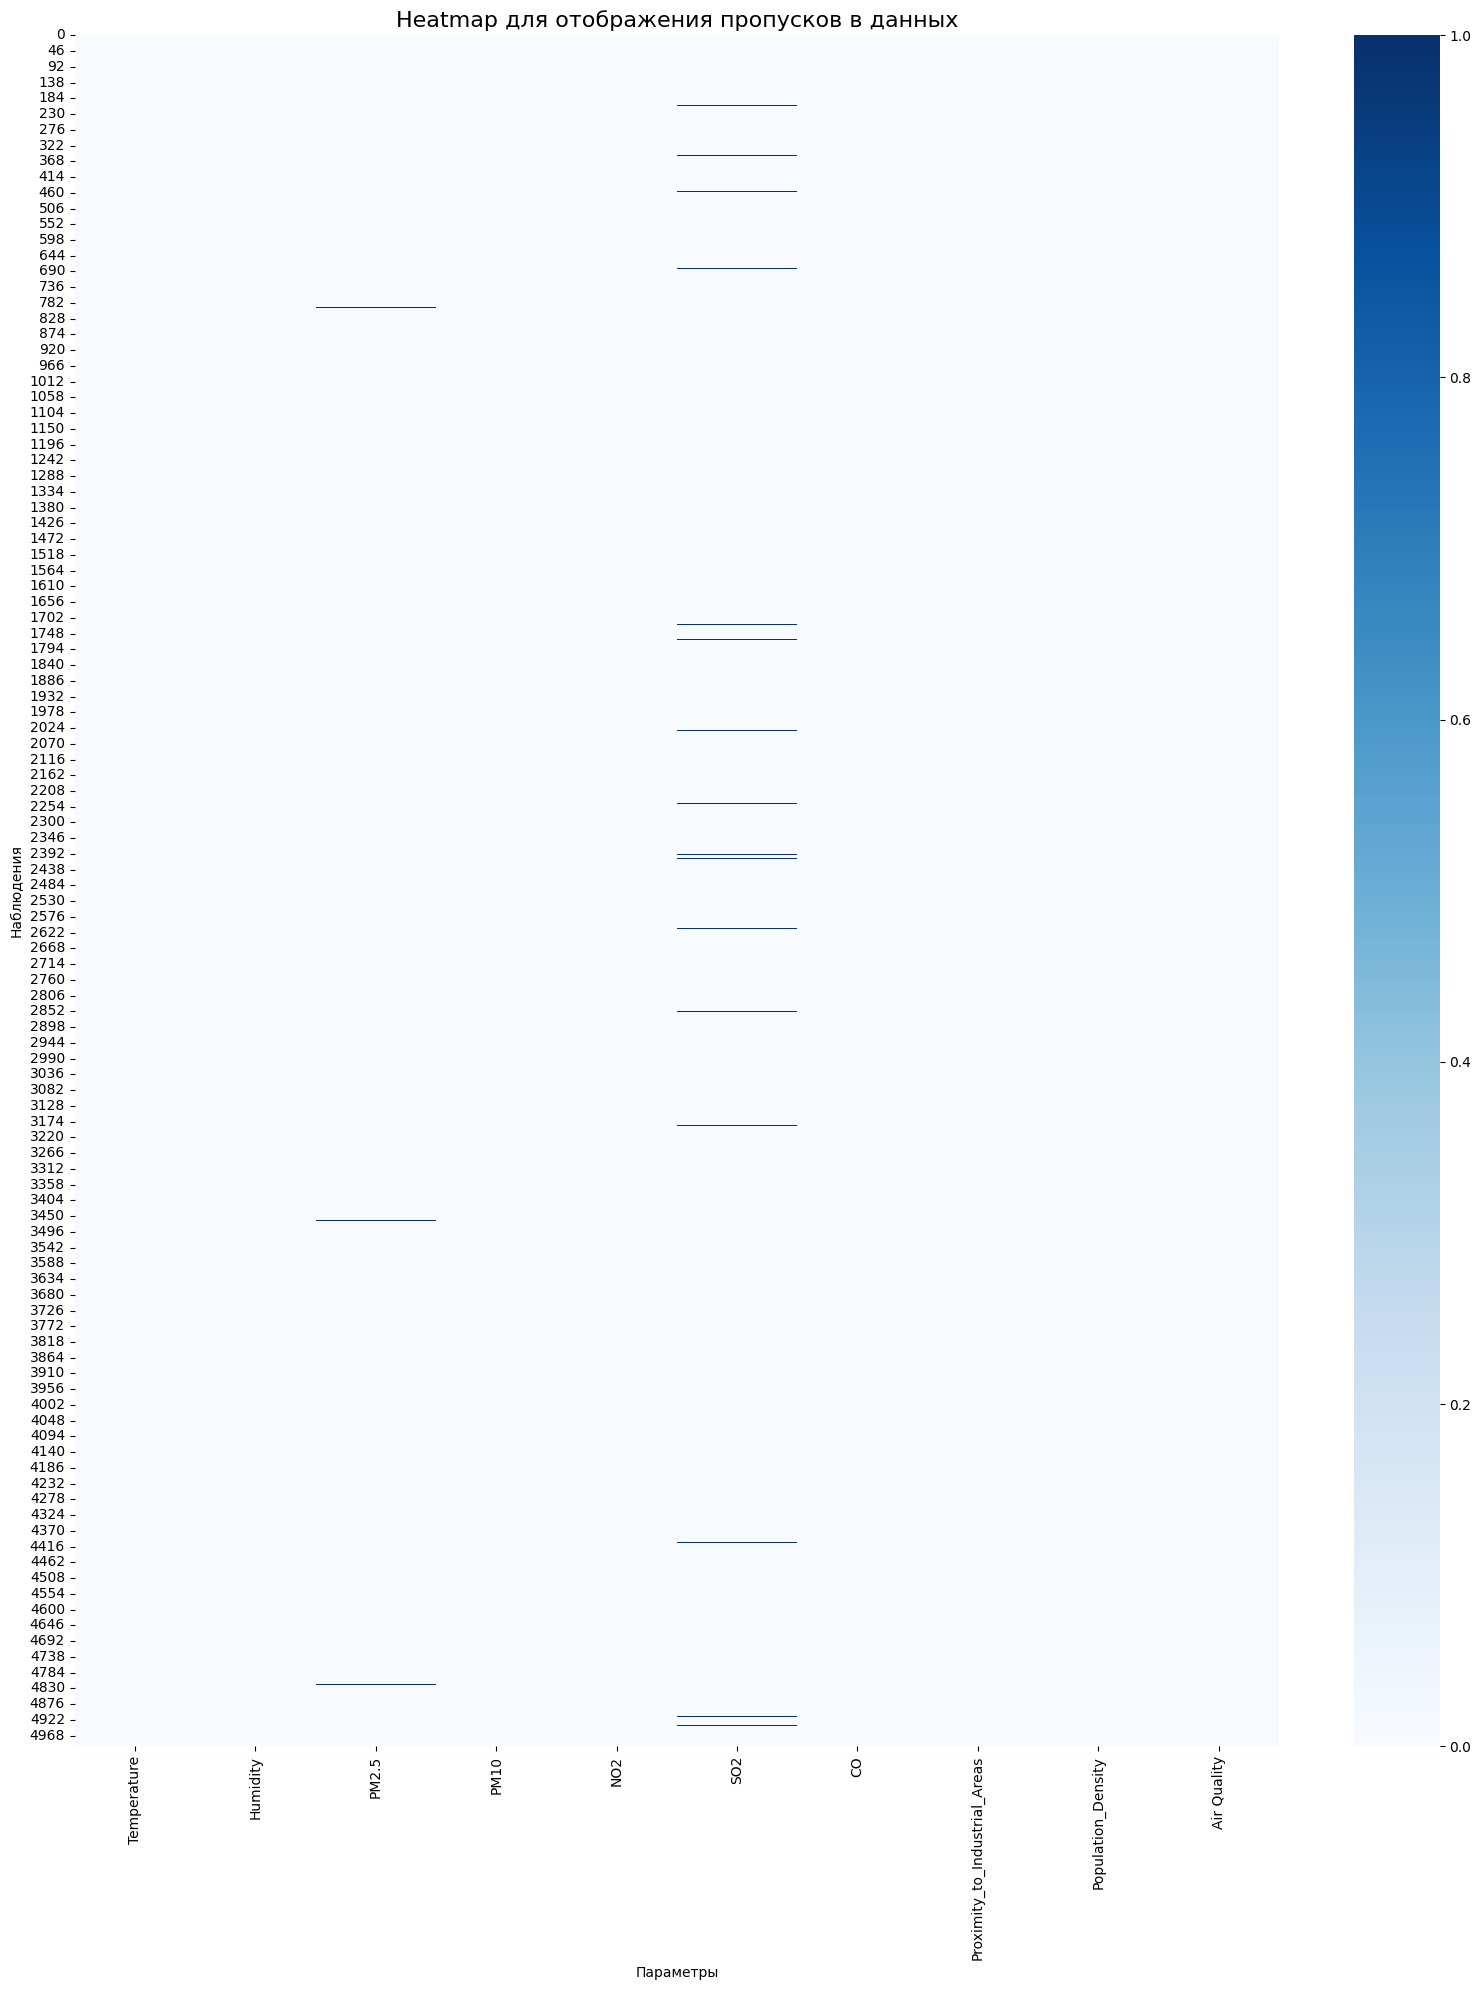

In [ ]:
df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x <= 0 else x)
nulls = df[df.isnull().any(axis=1)]
plt.figure(figsize=(16, 20))  # Увеличиваем размер графика
sns.heatmap(df.isnull(), cmap="Blues")
plt.title('Heatmap для отображения пропусков в данных', fontsize=16)
plt.xlabel('Параметры')
plt.ylabel('Наблюдения')
plt.tight_layout()
plt.show()




## График 6

Постройте график среднего значения переменной `PM10` в зависимости от переменной `Air Polution`.

чем выше pm10 тем выше загрязнение

<ipython-input-76-10cc7c9cf09e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Air Quality', y='PM10', palette='Blues')


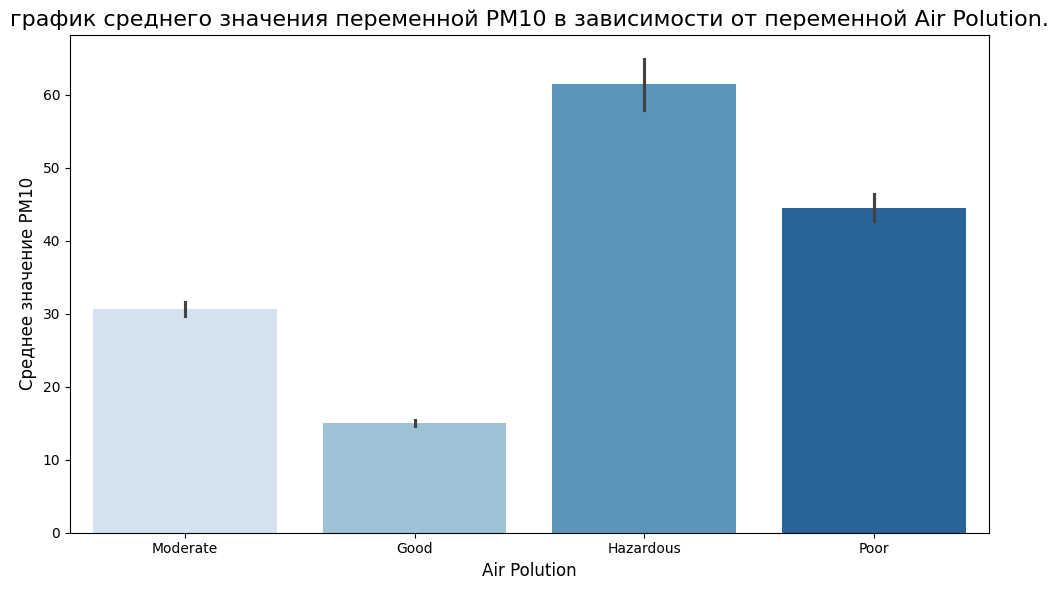

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Air Quality', y='PM10', palette='Blues')

plt.title('график среднего значения переменной PM10 в зависимости от переменной Air Polution.', fontsize=16)
plt.xlabel('Air Polution', fontsize=12)
plt.ylabel('Среднее значение PM10', fontsize=12)

plt.tight_layout()
plt.show()

## График 7

Найдите любой **нестандартный** график и постройте его. На ваш выбор.

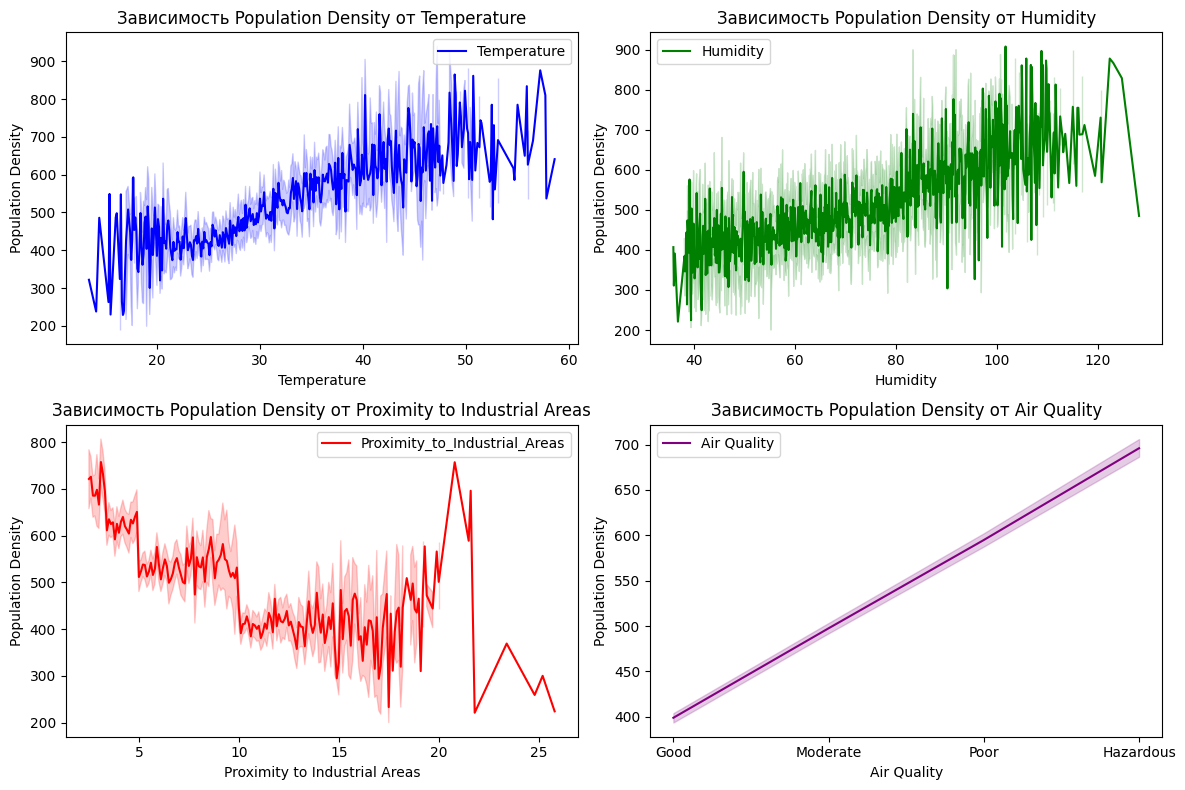

In [ ]:

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.lineplot(data=df, x='Temperature', y='Population_Density', label='Temperature', color='blue', ax=ax[0, 0])
ax[0, 0].set_title('Зависимость Population Density от Temperature')
ax[0, 0].set_xlabel('Temperature')
ax[0, 0].set_ylabel('Population Density')

sns.lineplot(data=df, x='Humidity', y='Population_Density', label='Humidity', color='green', ax=ax[0, 1])
ax[0, 1].set_title('Зависимость Population Density от Humidity')
ax[0, 1].set_xlabel('Humidity')
ax[0, 1].set_ylabel('Population Density')

sns.lineplot(data=df, x='Proximity_to_Industrial_Areas', y='Population_Density', label='Proximity_to_Industrial_Areas', color='red', ax=ax[1, 0])
ax[1, 0].set_title('Зависимость Population Density от Proximity to Industrial Areas')
ax[1, 0].set_xlabel('Proximity to Industrial Areas')
ax[1, 0].set_ylabel('Population Density')

ax[1, 1].set_xticks([0, 1, 2, 3])
ax[1, 1].set_xticklabels(['Good', 'Moderate', 'Poor', 'Hazardous'])
sns.lineplot(data=df, x='air', y='Population_Density', label='Air Quality', color='purple', ax=ax[1, 1])
ax[1, 1].set_title('Зависимость Population Density от Air Quality')
ax[1, 1].set_xlabel('Air Quality')
ax[1, 1].set_ylabel('Population Density')

plt.tight_layout()

plt.show()


https://github.com/Adelaaas/Data_science_basic_24_25_group_1
trofimtrotro NiuHn6tM5Re3y3@